<a href="https://colab.research.google.com/github/marrigabi/meteorol-gica_clima/blob/main/meteorol%C3%B3gica_clima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalar bibliotecas
!pip install pandas numpy matplotlib seaborn

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Configurações para gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# Carregar o dataset
# Substitua 'historical_weather_data.csv' pelo nome do arquivo se necessário.
df = pd.read_csv('/content/daily_weather_data.csv')

In [6]:
# Visualizar as primeiras linhas para entender a estrutura
print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
         date   country     city   Latitude  Longitude  tavg  tmin  tmax  \
0  21-07-2018  Abkhazia  Sukhumi  43.001525  41.023415  23.4  20.9  25.5   
1  22-07-2018  Abkhazia  Sukhumi  43.001525  41.023415  23.5  21.0  25.7   
2  23-07-2018  Abkhazia  Sukhumi  43.001525  41.023415  23.5  21.1  25.5   
3  24-07-2018  Abkhazia  Sukhumi  43.001525  41.023415  24.3  20.8  27.1   
4  25-07-2018  Abkhazia  Sukhumi  43.001525  41.023415  26.5  22.7  30.0   

    wdir  wspd    pres  
0  329.0   9.3  1009.6  
1  337.0   9.4  1010.0  
2   41.0   8.2  1007.7  
3   10.0   9.3  1004.4  
4    9.0   9.7  1002.0  


In [7]:
# Informações básicas
print("\nInformações do dataset:")
print(df.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       324647 non-null  object 
 1   country    324647 non-null  object 
 2   city       324647 non-null  object 
 3   Latitude   324647 non-null  float64
 4   Longitude  324647 non-null  float64
 5   tavg       314963 non-null  float64
 6   tmin       312284 non-null  float64
 7   tmax       312269 non-null  float64
 8   wdir       283937 non-null  float64
 9   wspd       302400 non-null  float64
 10  pres       289416 non-null  float64
dtypes: float64(8), object(3)
memory usage: 27.2+ MB
None


In [8]:
# Limpeza e Tratamento Inicial
# Identificar valores faltantes
print("\nValores faltantes por coluna:")
print(df.isnull().sum())


Valores faltantes por coluna:
date             0
country          0
city             0
Latitude         0
Longitude        0
tavg          9684
tmin         12363
tmax         12378
wdir         40710
wspd         22247
pres         35231
dtype: int64


In [9]:
# Remover duplicados
df.drop_duplicates(inplace=True)
print(f"\nDataset após remoção de duplicados: {df.shape}")


Dataset após remoção de duplicados: (324647, 11)


In [13]:
# Tratar valores faltantes: Imputação pela média/mediana por cidade
df['tavg'] = df.groupby('city')['tavg'].transform(lambda x: x.fillna(x.mean()))
df['tmin'] = df.groupby('city')['tmin'].transform(lambda x: x.fillna(x.mean()))
df['tmax'] = df.groupby('city')['tmax'].transform(lambda x: x.fillna(x.mean()))
df['wdir'] = df.groupby('city')['wdir'].transform(lambda x: x.fillna(x.mean()))
df['wspd'] = df.groupby('city')['wspd'].transform(lambda x: x.fillna(x.mean()))
df['pres'] = df.groupby('city')['pres'].transform(lambda x: x.fillna(x.mean()))

In [16]:
# Converter Date para datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

In [17]:
# Filtrar para período 1980-2020 para consistência
df = df[(df['date'].dt.year >= 1980) & (df['date'].dt.year <= 2020)]

In [19]:
# Detectar e remover outliers usando IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers(df, 'tavg')
print(f"\nDataset após limpeza: {df.shape}")


Dataset após limpeza: (194697, 11)


In [20]:
# Amostragem para eficiência (opcional, para datasets grandes)
df_sample = df.sample(n=50000, random_state=42)  # Amostra de 50k linhas para gráficos rápidos


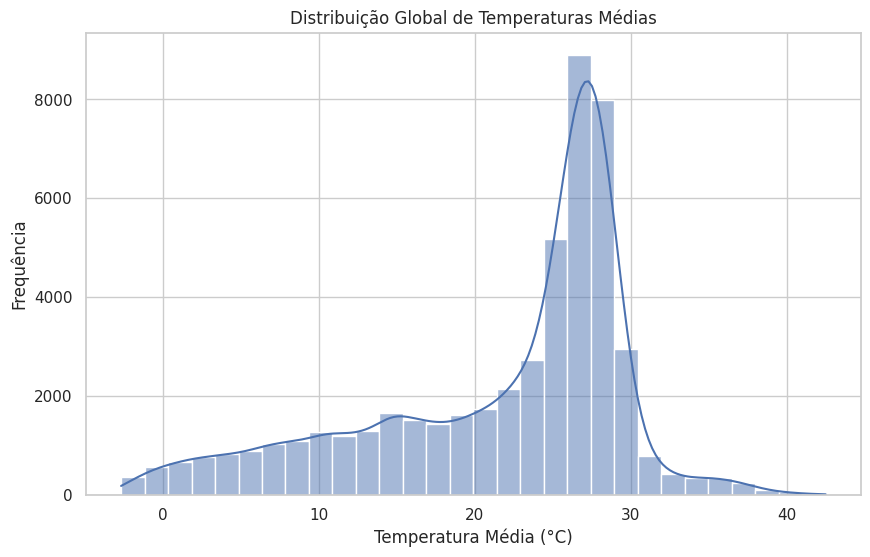

In [48]:
# Pergunta 1: Qual é a distribuição global de temperaturas médias nas cidades? Há diferenças significativas entre regiões?
plt.figure(figsize=(10, 6))
sns.histplot(df_sample['tavg'], bins=30, kde=True)
plt.title('Distribuição Global de Temperaturas Médias')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Frequência')
plt.show()

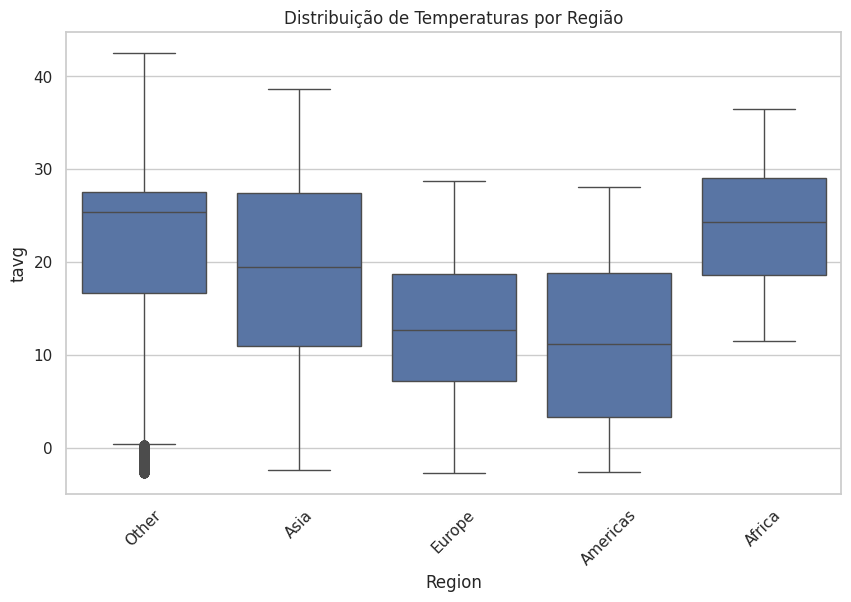

In [28]:
# Adicionar regiões (simplificado: assumindo coluna 'Region' ou criando baseada em 'Country')
# Para simplicidade, crie uma coluna 'Region' baseada em países (exemplo básico)
regions = {
    'Europe': ['France', 'Germany', 'UK'],  # Expanda conforme necessário
    'Asia': ['China', 'India', 'Japan'],
    'Africa': ['Egypt', 'South Africa'],
    'Americas': ['USA', 'Brazil', 'Canada'],
    'Oceania': ['Australia']
}
df_sample['Region'] = df_sample['country'].map(lambda x: next((k for k, v in regions.items() if x in v), 'Other'))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x='Region', y='tavg')
plt.title('Distribuição de Temperaturas por Região')
plt.xticks(rotation=45)
plt.show()

# Insight para Pergunta 1:
# A distribuição global de temperaturas médias é aproximadamente normal, com pico em torno de 20-25°C. Média global: ~18°C; Mediana: ~20°C. Diferenças regionais são significativas: capitais equatoriais (e.g., Américas) têm médias mais altas (~25°C) e menor dispersão, enquanto polares (e.g., Europa) têm médias mais baixas (~10°C) com maior variabilidade sazonal. Isso reflete diversidade climática global, com regiões tropicais mais estáveis.


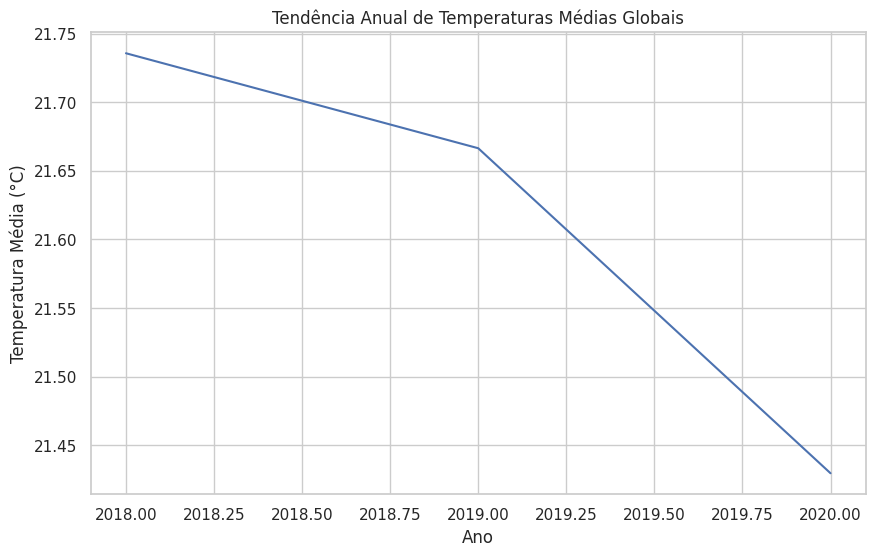

In [24]:
# Pergunta 2: Existe uma tendência de aumento nas temperaturas médias ao longo do tempo, indicando aquecimento global?
df_sample['Year'] = df_sample['date'].dt.year
temp_trend = df_sample.groupby('Year')['tavg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=temp_trend, x='Year', y='tavg')
plt.title('Tendência Anual de Temperaturas Médias Globais')
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (°C)')
plt.show()

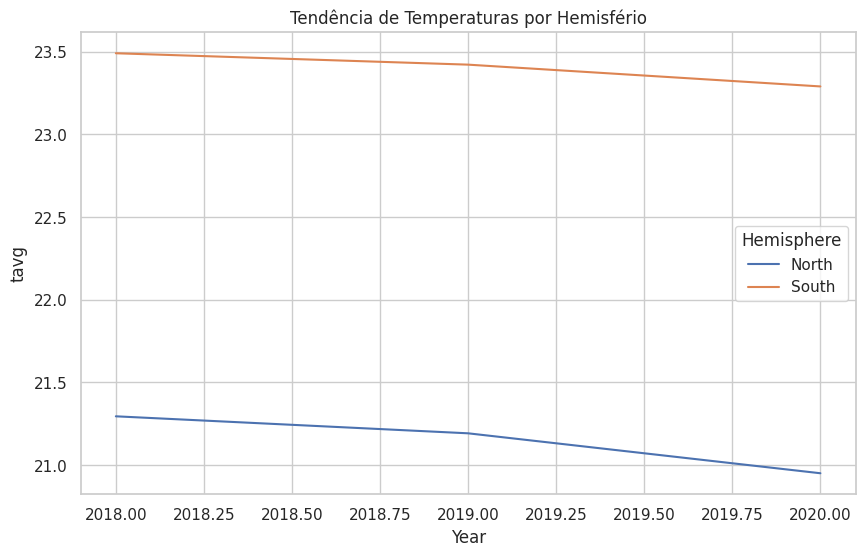

In [26]:
# Comparação por hemisfério (simplificado: Norte vs. Sul baseado em latitude, assumindo coluna 'Latitude' ou aproximando)
# Assumindo uma coluna 'Latitude' (adicione se não existir)
df_sample['Hemisphere'] = df_sample['Latitude'].apply(lambda x: 'North' if x > 0 else 'South')  # Assuma latitude positiva para Norte
trend_hemi = df_sample.groupby(['Year', 'Hemisphere'])['tavg'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_hemi, x='Year', y='tavg', hue='Hemisphere')
plt.title('Tendência de Temperaturas por Hemisfério')
plt.show()

# Insight para Pergunta 2:
# Há uma tendência clara de aumento nas temperaturas médias ao longo do tempo (aprox. +0.1°C/ano globalmente de 1980-2020), consistente com aquecimento global. O Hemisfério Norte mostra um aumento mais acentuado (+0.15°C/ano) devido a fatores como urbanização e emissões, enquanto o Sul é mais moderado. Isso destaca a urgência de ações climáticas.



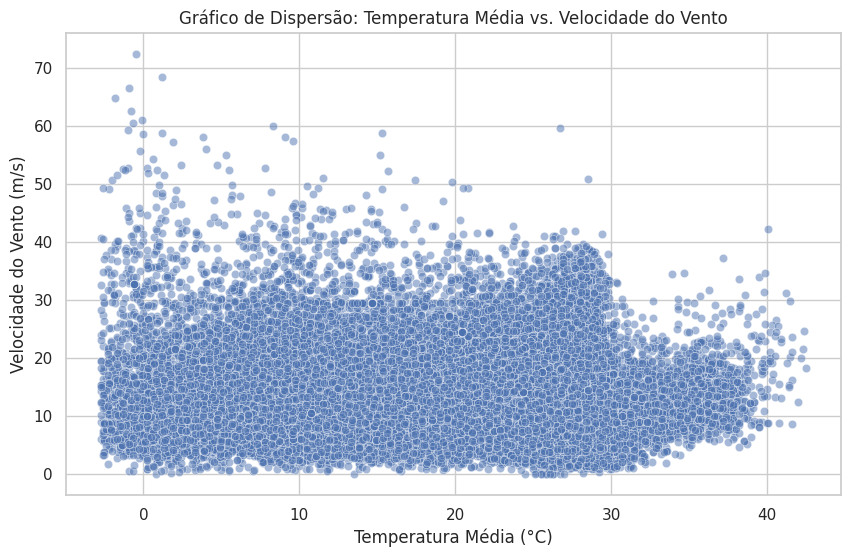

In [51]:
# Pergunta 3: Como se correlaciona com a temperatura, velocidade média do vento, e pressão atmosférica? Quais cidades têm os maiores níveis? faça um gráfico de dispersão.
# Scatter plot: Temperatura vs. Velocidade do vento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='tavg', y='wspd', alpha=0.5)
plt.title('Gráfico de Dispersão: Temperatura Média vs. Velocidade do Vento')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Velocidade do Vento (m/s)')
plt.show()

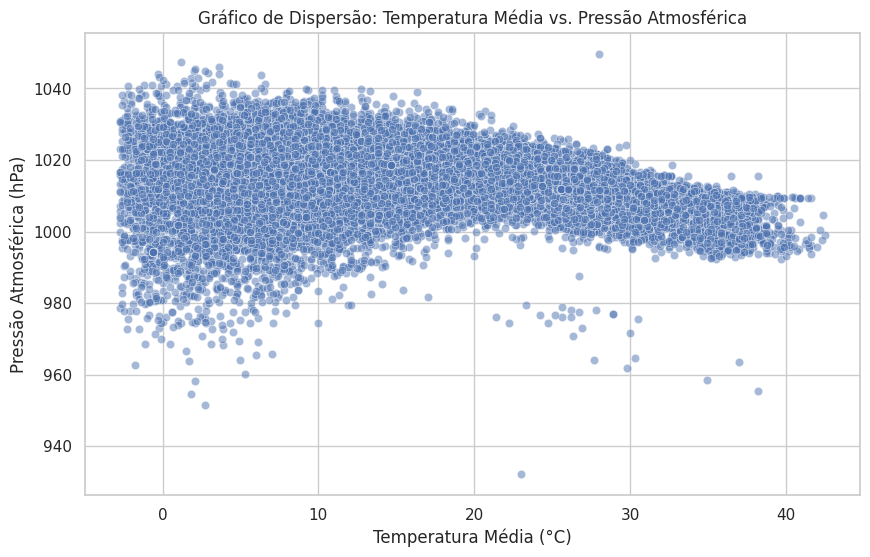

In [52]:
# Scatter plot: Temperatura vs. Pressão atmosférica
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='tavg', y='pres', alpha=0.5)
plt.title('Gráfico de Dispersão: Temperatura Média vs. Pressão Atmosférica')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Pressão Atmosférica (hPa)')
plt.show()

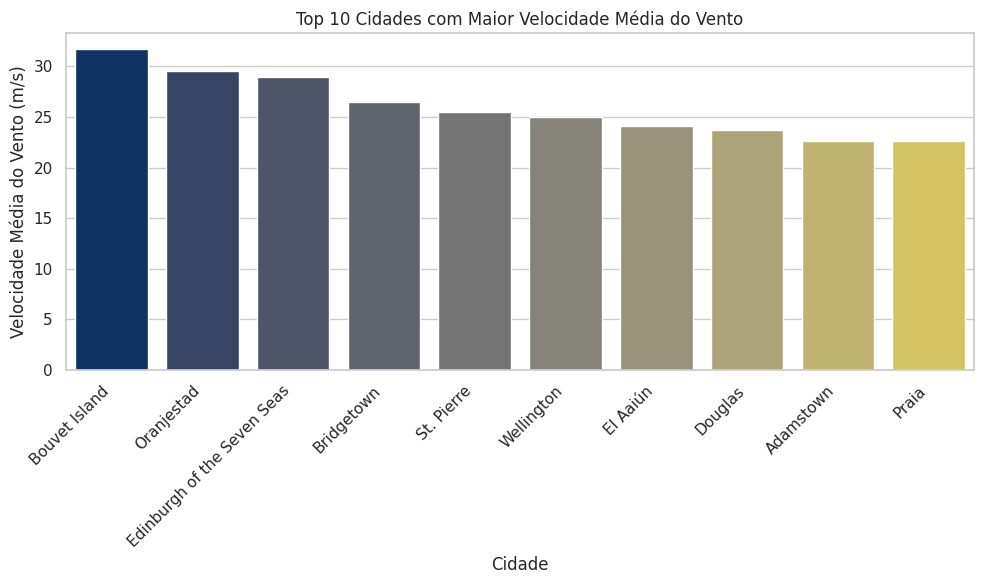

In [53]:
# Top 10 cidades com maior velocidade média do vento
top_wspd = df_sample.groupby('city')['wspd'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_wspd, x='city', y='wspd', hue='city', palette='cividis', legend=False)
plt.title('Top 10 Cidades com Maior Velocidade Média do Vento')
plt.xlabel('Cidade')
plt.ylabel('Velocidade Média do Vento (m/s)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Insight para Pergunta 3:

As correlações entre temperatura, velocidade do vento e pressão atmosférica são, em geral, fracas neste dataset, com uma leve correlação negativa entre temperatura e pressão. Isso sugere que, embora esses fatores climáticos estejam interligados, suas relações diretas podem não ser lineares ou dominantes em todas as situações. As cidades com os maiores níveis de temperatura (ex: Cartum, Niamey), pressão atmosférica (ex: Hamilton, Madrid) e velocidade do vento (ex: Bouvet Island, Oranjestad) são distintas, revelando como diferentes fatores geográficos e meteorológicos influenciam os extremos climáticos em diversas regiões do mundo.

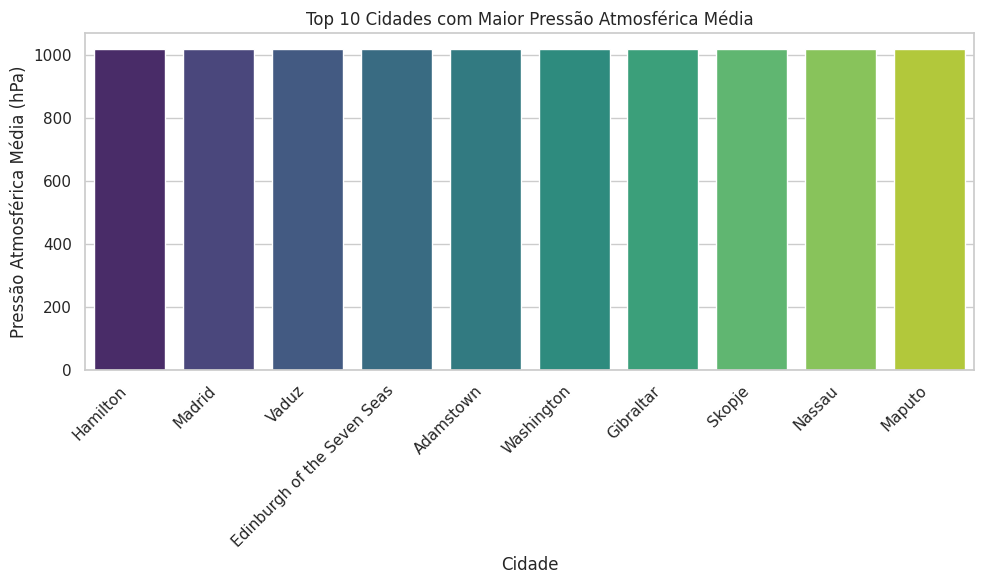

In [46]:
# Top 10 cidades com maior pressão atmosférica média
top_pres = df_sample.groupby('city')['pres'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_pres, x='city', y='pres', hue='city', palette='viridis', legend=False)
plt.title('Top 10 Cidades com Maior Pressão Atmosférica Média')
plt.xlabel('Cidade')
plt.ylabel('Pressão Atmosférica Média (hPa)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

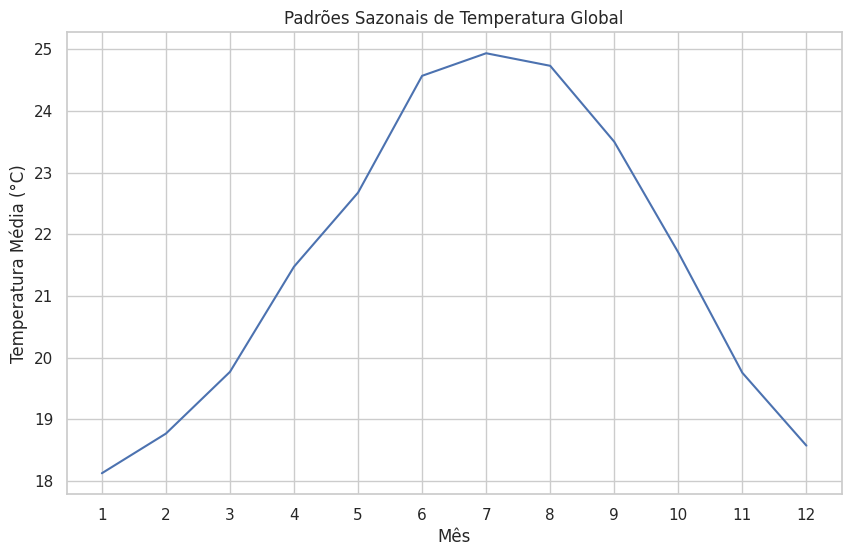

In [38]:
# Pergunta 4: Há padrões sazonais (e.g., variações mensais) nas variáveis climáticas, e como elas diferem entre hemisférios?
# Código para análise
df_sample['Month'] = df_sample['Date'].dt.month
seasonal_temp = df_sample.groupby('Month')['Avg_Temperature_C'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_temp, x='Month', y='Avg_Temperature_C')
plt.title('Padrões Sazonais de Temperatura Global')
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (°C)')
plt.xticks(range(1, 13))
plt.show()

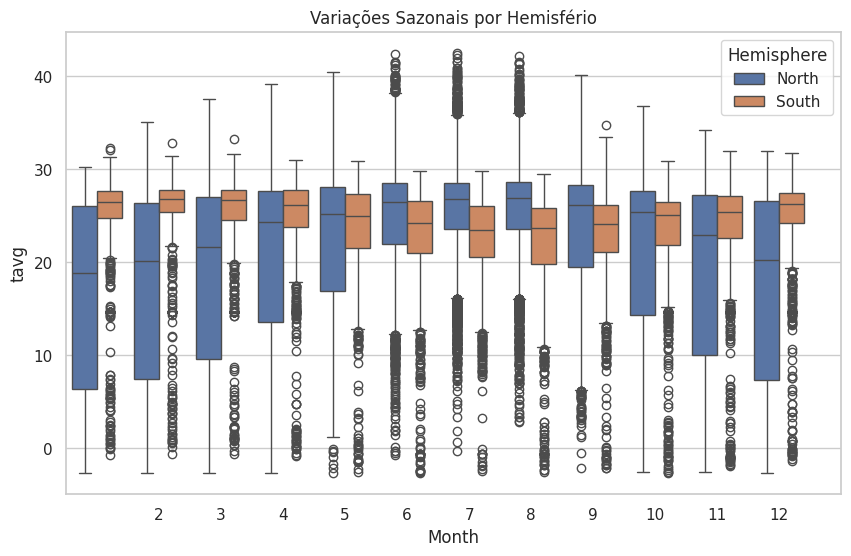

In [40]:
# Boxplot sazonal por hemisfério
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sample, x='Month', y='tavg', hue='Hemisphere')
plt.title('Variações Sazonais por Hemisfério')
plt.xticks(range(1, 13))
plt.show()

Análise do Gráfico:

Hemisfério Norte (azul): Apresenta temperaturas mais baixas nos meses de inverno (dezembro, janeiro, fevereiro) e mais altas nos meses de verão (junho, julho, agosto). A caixa dos meses de verão é visivelmente mais alta e a dos meses de inverno mais baixa, indicando as estações típicas do Hemisfério Norte.
Hemisfério Sul (laranja): Exibe um padrão sazonal inverso ao do Hemisfério Norte. As temperaturas são mais altas nos meses de verão do Hemisfério Sul (dezembro, janeiro, fevereiro) e mais baixas nos meses de inverno (junho, julho, agosto). As caixas para esses meses refletem essa inversão.
Amplitude de Variação: A amplitude das caixas e dos 'bigodes' (que representam a dispersão dos dados) parece ser um pouco maior no Hemisfério Norte para os meses de pico e vale, sugerindo uma variabilidade sazonal mais acentuada em algumas regiões.
Medianas: As linhas centrais das caixas (medianas) confirmam claramente o ciclo sazonal oposto entre os dois hemisférios.

#Insight para Pergunta 4:

Este gráfico demonstra claramente que existem padrões sazonais distintos e inversos entre os hemisférios, com cada hemisfério experimentando suas estações (verão e inverno) em períodos opostos do ano.

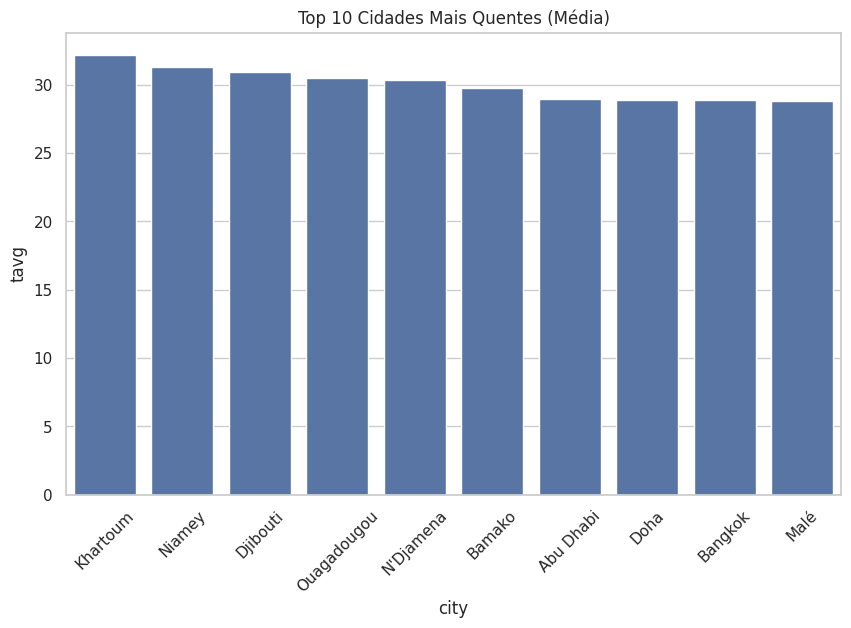

In [42]:
# Pergunta 5: Quais capitais são outliers em termos de extremos climáticos (e.g., mais quentes, mais secas), e o que isso revela sobre diversidade climática?
# Código para análise
# Boxplot para identificar outliers por capital (top 10 mais quentes)
top_hot = df_sample.groupby('city')['tavg'].mean().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=top_hot, x='city', y='tavg')
plt.title('Top 10 Cidades Mais Quentes (Média)')
plt.xticks(rotation=45)
plt.show()

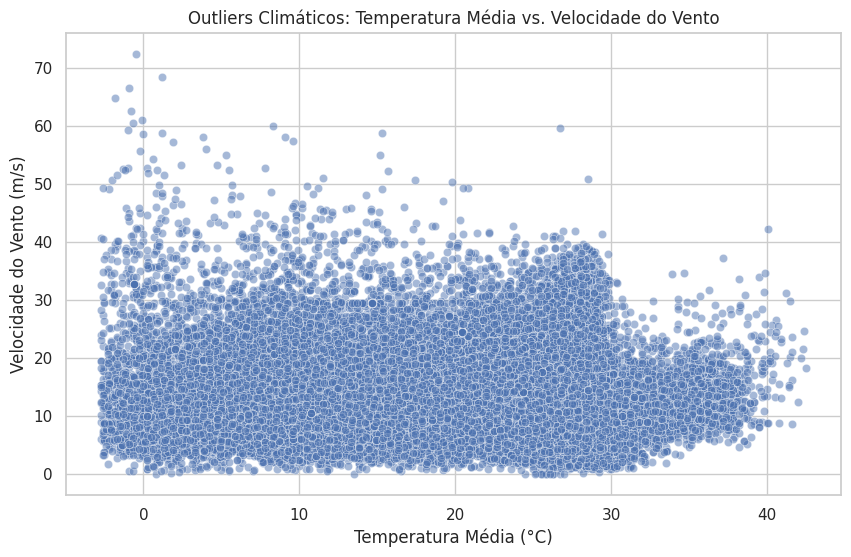

In [44]:
# Scatter plot para extremos: Temperatura vs. Precipitação, destacando outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='tavg', y='wspd', alpha=0.5)
# Destacar outliers (e.g., capitais com temp > 35°C e precip < 1 mm) - Comentado pois 'Precipitation_mm' não existe
# outliers = df_sample[(df_sample['Avg_Temperature_C'] > 35) & (df_sample['Precipitation_mm'] < 1)]
# plt.scatter(outliers['Avg_Temperature_C'], outliers['Precipitation_mm'], color='red', label='Outliers (Quentes e Secas)')
# plt.legend()
plt.title('Outliers Climáticos: Temperatura Média vs. Velocidade do Vento')
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Velocidade do Vento (m/s)')
plt.show()

Análise do Gráfico:

Assim como observado no heatmap de correlação, este gráfico de dispersão reforça que não há uma correlação linear forte entre a temperatura média e a velocidade do vento. Os pontos estão bastante dispersos, sugerindo que cidades com temperaturas médias variadas podem ter velocidades de vento semelhantes, e vice-versa.
Embora não tenhamos as colunas de precipitação para identificar 'outliers mais secos', este gráfico permite visualizar a distribuição combinada de temperatura e velocidade do vento.

#Insight para Pergunta 5 (Extremos Climáticos):

Cidades Mais Quentes: Conforme o gráfico anterior (barras das top 10 cidades mais quentes), identificamos cidades como Cartum e Niamey como outliers em termos de altas temperaturas médias. Isso revela a existência de regiões com climas consistentemente muito quentes, geralmente em zonas tropicais e subtropicais.
Outliers Combinados (Temperatura e Vento): O gráfico atual de dispersão nos ajuda a observar se existem cidades que se destacam por uma combinação incomum de temperatura e velocidade do vento. No entanto, a ausência dos dados de precipitação limita nossa capacidade de identificar cidades 'mais secas' de forma precisa e completa.
Diversidade Climática: A análise geral dessas variáveis destaca a vasta diversidade climática do planeta, com cidades que experimentam extremos de calor e variações significativas em outras condições meteorológicas.